## **KELOMPOK DATA LAB**

1. Oktavian Dwi Putra
2. Muhammad Ilham
3. Maulid Uly Mada
4. Seto Bhanu Adyatma
5. Mega Pangastuti
6. Rasyidah Maulida Putri Andini
7. Muhammad Hasbi Ashshiddiqi
8. Raihan Damar


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

plt.style.use("default")
warnings.filterwarnings("ignore")

# **1. Data Cleansing (50 poin**)

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:

A. Handle missing values<br>
B. Handle duplicated data<br>
C. Handle outliers<br>
D. Feature encoding<br>

Di laporan *homework*, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.

Tetap tuliskan jika memang ada tidak yang perlu di-*handle* (contoh: `Tidak perlu feature encoding karena semua feature sudah numerical` atau `Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier`).

In [ ]:
# Membaca database
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', 100)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Membagi dataset menjadi kolom numerik dan kategorik
numerical   = df.select_dtypes(['int64', 'float64'])
categorical = df.select_dtypes(['object'])

In [ ]:
# Menampilkan statistika deskriptif kolom numerik
numerical.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Menampilkan jumlah nilai unik pada masing-masing kolom numerik
numerical.nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [ ]:
# Menampilkan statistika deskriptif kolom kategorikal
categorical.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


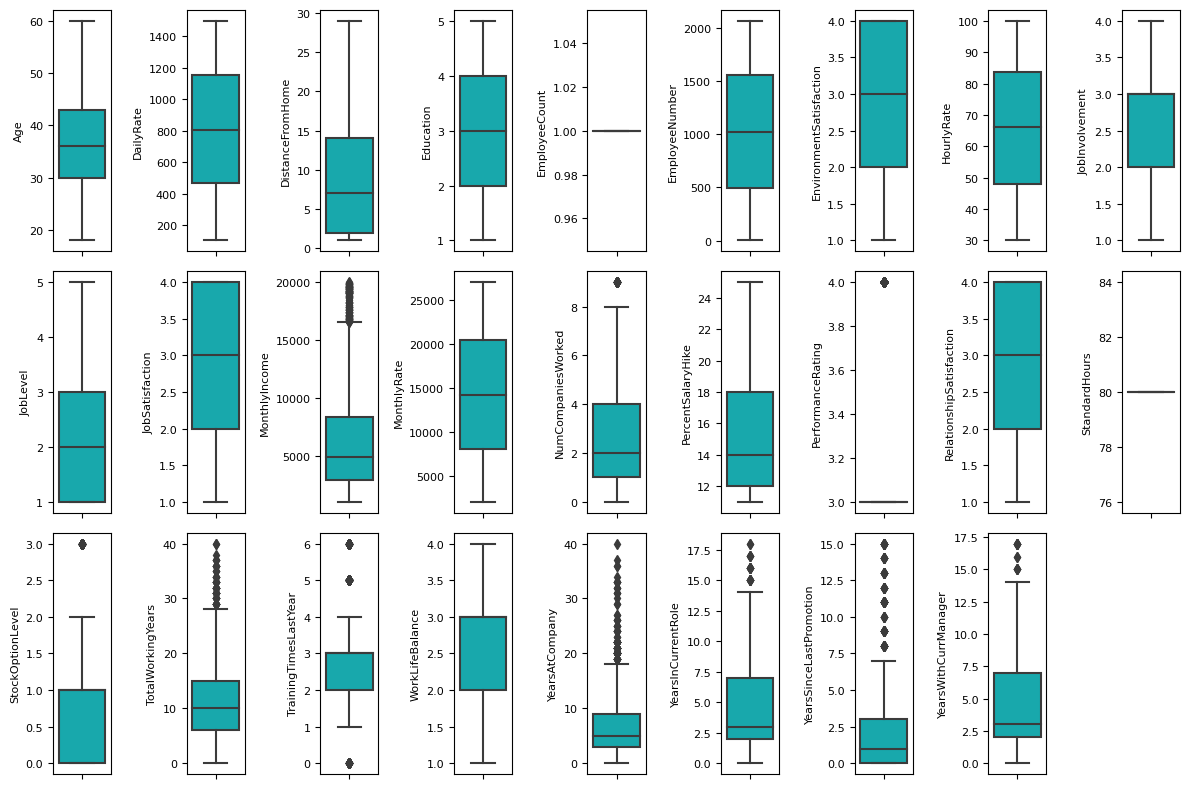

In [ ]:
# Mengambil nama kolom numerik
features_num = numerical.columns

# Mengatur ukuran gambar
plt.figure(figsize = (12, 8))

# Menampilkan boxplot kolom numerik
for i in range(0, len(features_num)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y = df[features_num[i]], color = '#00bfc4', orient = 'v')
    plt.ylabel(features_num[i], fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.tight_layout()

plt.show()

Dilakukan penghapusan kolom `EmployeeCount`, `StandardHours`, `Over18`, karena kolom-kolom tersebut hanya memiliki **1 nilai unik**. Kemudian, dilakukan penghapusan kolom `EmployeeNumber`, karena kolom tersebut memiliki jumlah nilai unik yang **sama dengan jumlah baris** yang ada.

## A. Handle Missing Value

In [ ]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
print("Jumlah nilai kosong pada masing-masing kolom :")
df.isna().sum()

Jumlah nilai kosong pada masing-masing kolom :


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Berdasarkan informasi di atas didapatkan bahwa **tidak terdapat missing value** pada semua kolom yang ada sehingga tidak diperlukan proses penghapusan *missing values*.

## B. Handle Duplicated Data

In [ ]:
# Menampilkan jumlah data duplicate
print("Jumlah data duplikat :")
df.duplicated().sum()

Jumlah data duplikat :


0

Berdasarkan informasi di atas didapatkan bahwa **tidak terdapat data yang terduplikasi** sehingga tidak diperlukan proses penghapusan *duplicated data*.

## C. Handle Outliers

In [ ]:
# Menghapus outlier
from scipy import stats

print(f'Jumlah baris sebelum dilakukan penghapusan data outliers : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah dilakukan penghapusan data outliers : {len(df)}')

Jumlah baris sebelum dilakukan penghapusan data outliers : 1470
Jumlah baris setelah dilakukan penghapusan data outliers : 1387


- Dilakukan proses penghapusan data outliers pada kolom `MonthlyIncome`, `NumCompaniesWorked`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, dan `YearsWithCurrManager`.<br>
- Berdasarkan informasi di atas, didapatkan bahwa sebelum dilakukan penghapusan data *outliers* terdapat **1470** baris data dan setelah dilakukan penghapusan data *outliers* terdapat **1387** baris data.

## D. Feature Encoding

In [ ]:
# Melakukan label encoding pada kolom bertipe kategorik
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['BusinessTravel'] = LabelEncoder().fit_transform(df['BusinessTravel'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])

# Menampilkan data setelah dilakukan proses label encoding
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0


In [ ]:
# Melakukan one-hot encoding kolom kategorik
for cat in categorical:
  if cat not in ['Attrition', 'BusinessTravel', 'Gender', 'OverTime', 'Over18']:
    df1 = pd.get_dummies(df[cat], prefix=cat)
    df  = df.drop(cat, axis = 1)
    df  = df.join(df1)

# Menampilkan data setelah dilakukan proses one-hot encoding
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,1,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,2,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1387 non-null   int64 
 1   Attrition                          1387 non-null   int64 
 2   BusinessTravel                     1387 non-null   int64 
 3   DailyRate                          1387 non-null   int64 
 4   DistanceFromHome                   1387 non-null   int64 
 5   Education                          1387 non-null   int64 
 6   EmployeeCount                      1387 non-null   int64 
 7   EmployeeNumber                     1387 non-null   int64 
 8   EnvironmentSatisfaction            1387 non-null   int64 
 9   Gender                             1387 non-null   int64 
 10  HourlyRate                         1387 non-null   int64 
 11  JobInvolvement                     1387 non-null   int64 
 12  JobLev

# **2. Feature Engineering (35 poin**)

Cek feature yang ada sekarang, lalu lakukan:<br>

A. Feature selection (membuang feature yang kurang relevan atau redundan)<br>
B. Feature extraction (membuat feature baru dari feature yang sudah ada)<br>
C. Feature transformation<br>
D. Handle class imbalance<br>
E. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)<br>

Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: `Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan`)

## A. Feature Selection

In [ ]:
# Melakukan penghapusan kolom dengan nilai unik 1 dan nilai unik yang sama dengan jumlah baris
df_new = df.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1387 non-null   int64
 1   Attrition                          1387 non-null   int64
 2   BusinessTravel                     1387 non-null   int64
 3   DailyRate                          1387 non-null   int64
 4   DistanceFromHome                   1387 non-null   int64
 5   Education                          1387 non-null   int64
 6   EnvironmentSatisfaction            1387 non-null   int64
 7   Gender                             1387 non-null   int64
 8   HourlyRate                         1387 non-null   int64
 9   JobInvolvement                     1387 non-null   int64
 10  JobLevel                           1387 non-null   int64
 11  JobSatisfaction                    1387 non-null   int64
 12  MonthlyIncome       

In [ ]:
# Menghilangkan kolom yang memiliki nilai korelasi rendah terhadap target (korelasi dibawah 0.05)
# Kolom target yang akan digunakan sebagai referensi
target_column = 'Attrition'

# Hitung korelasi terhadap kolom target
correlation_with_target = df_new.corr()[target_column].drop(target_column)

# Hilangkan kolom-kolom dengan korelasi di bawah 0.05 terhadap kolom target
threshold = 0.05
columns_to_drop = correlation_with_target[abs(correlation_with_target) < threshold].index
data_filtered = df_new.drop(columns=columns_to_drop)

In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1387 non-null   int64
 1   Attrition                          1387 non-null   int64
 2   DailyRate                          1387 non-null   int64
 3   DistanceFromHome                   1387 non-null   int64
 4   EnvironmentSatisfaction            1387 non-null   int64
 5   JobInvolvement                     1387 non-null   int64
 6   JobLevel                           1387 non-null   int64
 7   JobSatisfaction                    1387 non-null   int64
 8   MonthlyIncome                      1387 non-null   int64
 9   NumCompaniesWorked                 1387 non-null   int64
 10  OverTime                           1387 non-null   int64
 11  RelationshipSatisfaction           1387 non-null   int64
 12  StockOptionLevel    

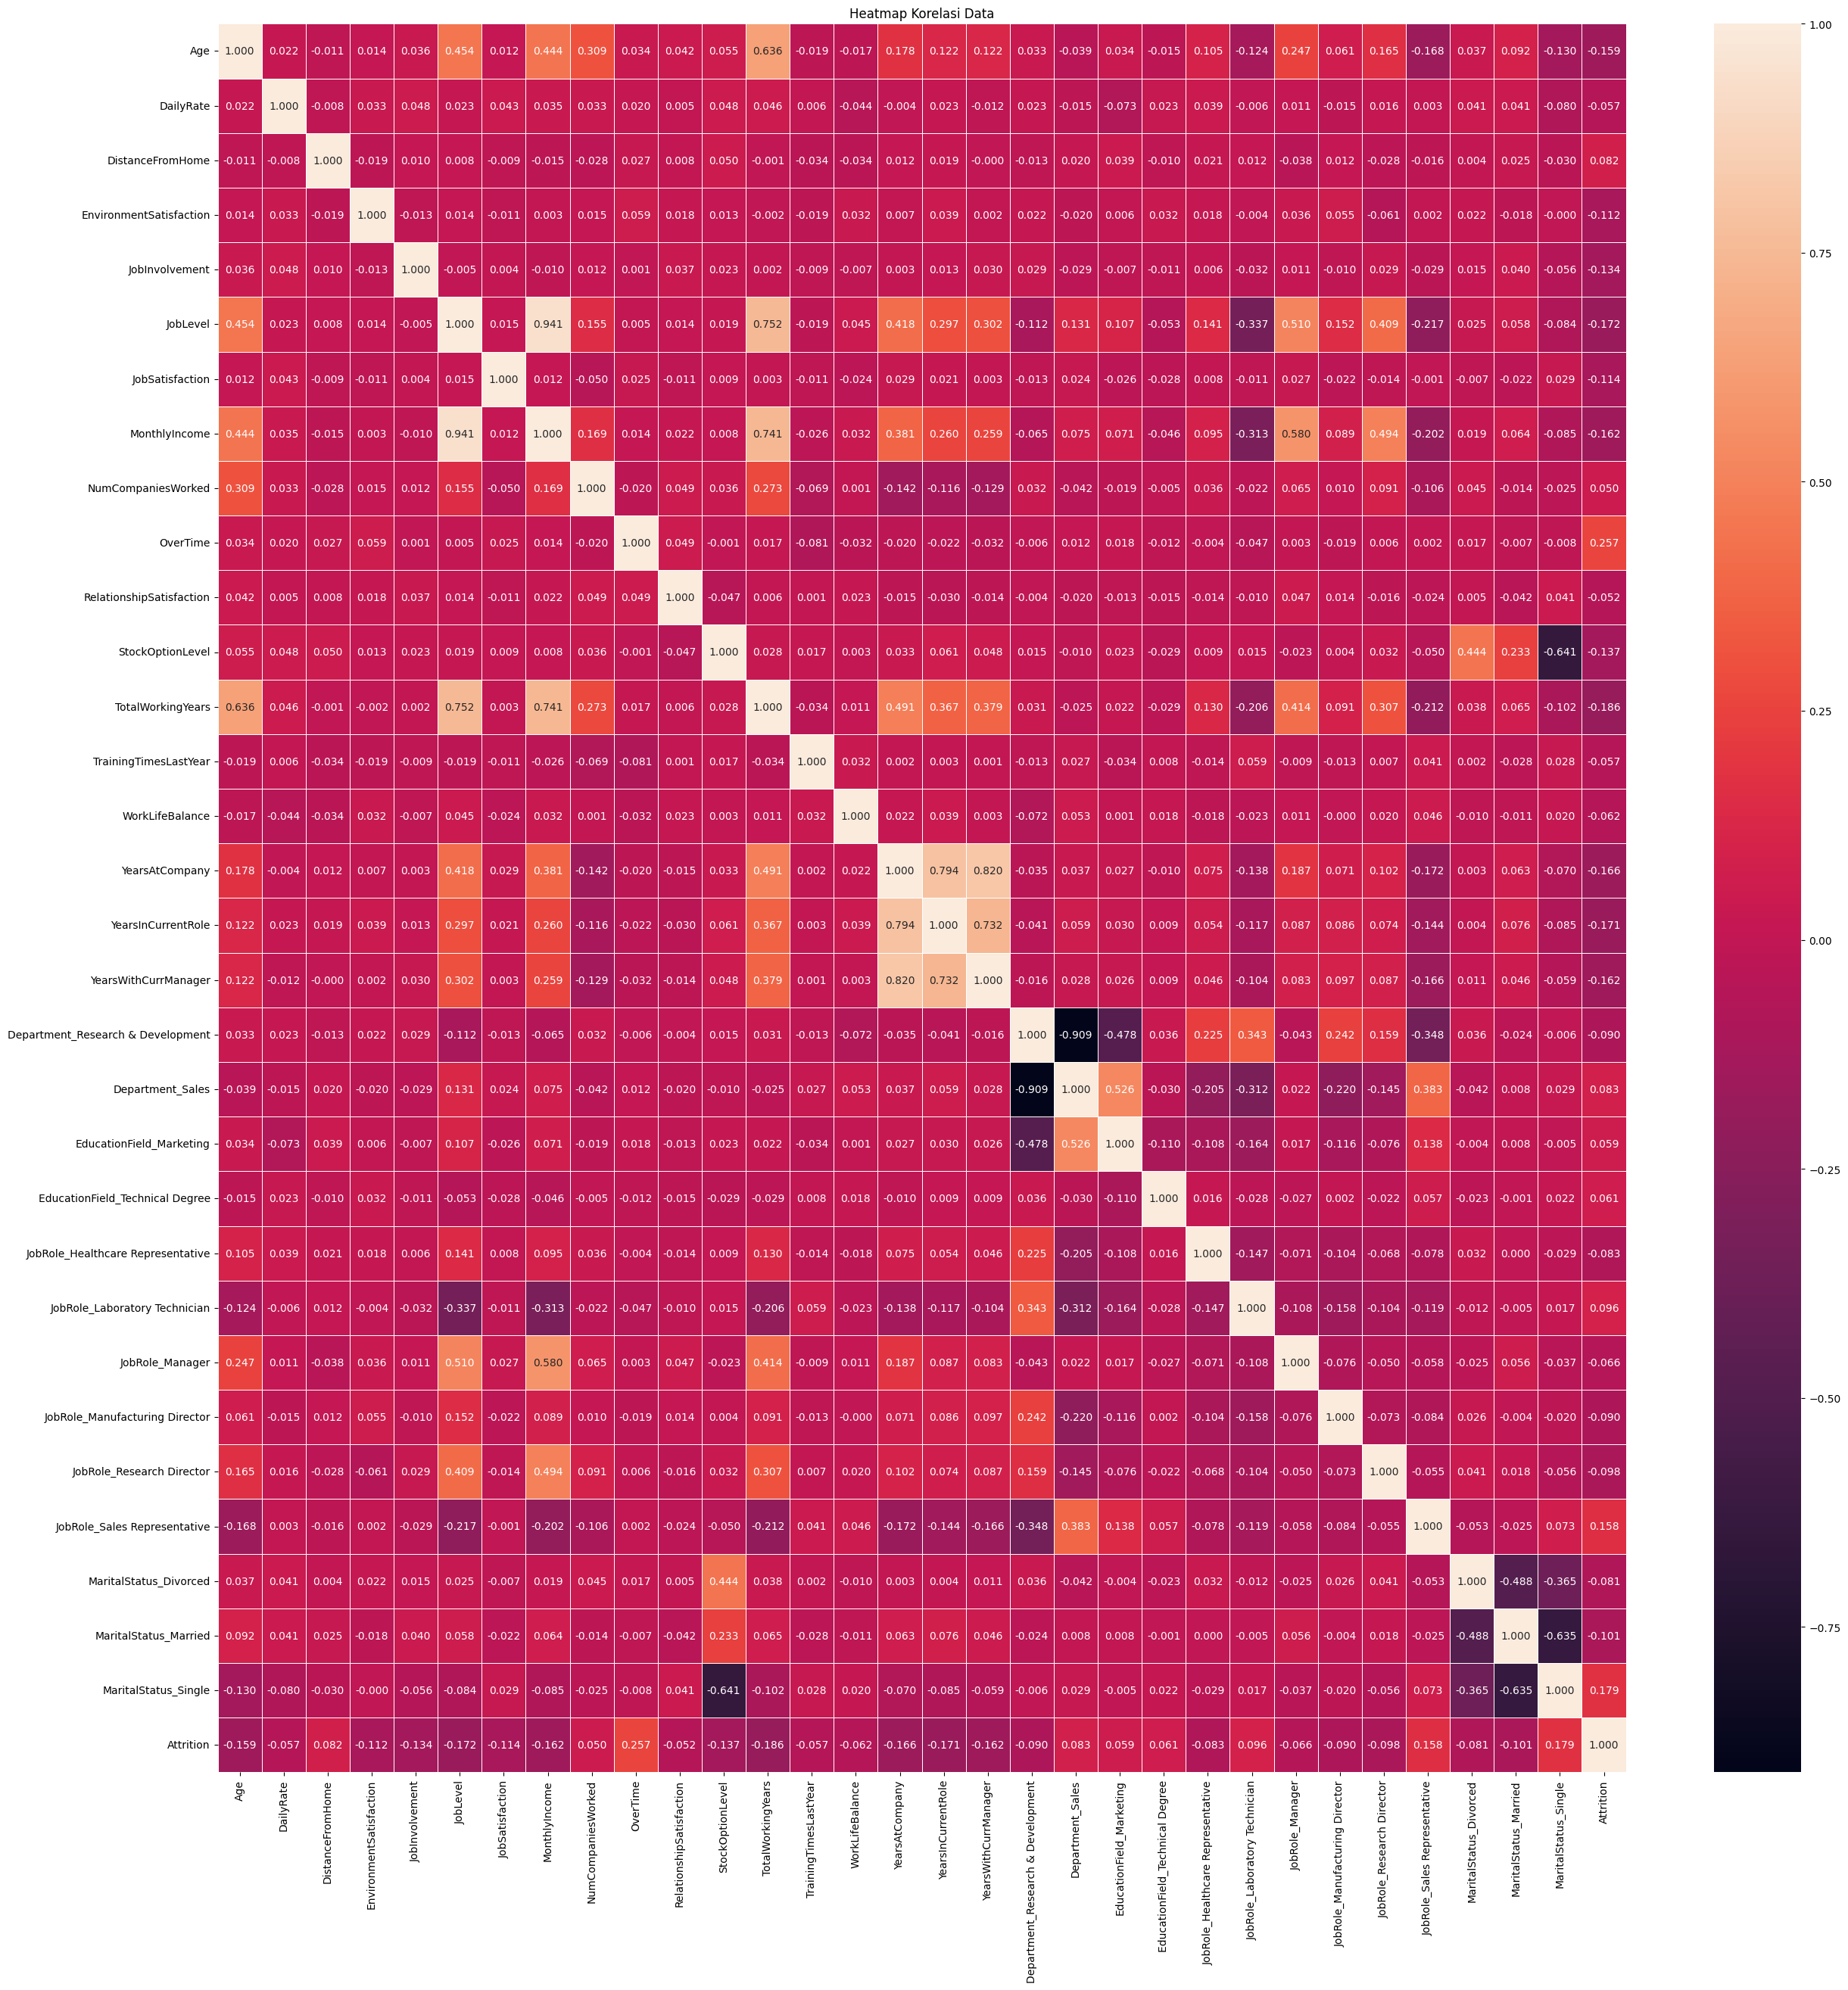

In [ ]:
# Meletakkan kolom Attrition di urutan terakhir
data_filtered = data_filtered.drop('Attrition', axis = 1)
data_filtered['Attrition'] = df_new['Attrition']

# Buat dan tampilkan heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(data_filtered.corr(), annot=True, fmt='.3f', linewidths=0.5)
plt.title('Heatmap Korelasi Data')
plt.show()

Terdapat **multicollinearity** atau korelasi yang memiliki nilai diatas 0.7 antara kolom `JobLevel`, `MonthlyIncome` dan `TotalWorkingYears` serta kolom `YearsAtCompany`, `YearsInCurrentRole` dan `YearsWithCurrManager` sehingga kita bisa memilih salah satu saja.

In [ ]:
data_filtered = data_filtered.drop(['JobLevel', 'MonthlyIncome', 'YearsAtCompany', 'YearsWithCurrManager'], axis = 1)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1387 non-null   int64
 1   DailyRate                          1387 non-null   int64
 2   DistanceFromHome                   1387 non-null   int64
 3   EnvironmentSatisfaction            1387 non-null   int64
 4   JobInvolvement                     1387 non-null   int64
 5   JobSatisfaction                    1387 non-null   int64
 6   NumCompaniesWorked                 1387 non-null   int64
 7   OverTime                           1387 non-null   int64
 8   RelationshipSatisfaction           1387 non-null   int64
 9   StockOptionLevel                   1387 non-null   int64
 10  TotalWorkingYears                  1387 non-null   int64
 11  TrainingTimesLastYear              1387 non-null   int64
 12  WorkLifeBalance     

## B. Feature Extraction

In [ ]:
# Menghapus kolom Attrition
data_filtered = data_filtered.drop('Attrition', axis = 1)

# Membuat fitur baru
data_filtered['SatisfactionMean'] = ( df_new['EnvironmentSatisfaction'] + df_new['JobSatisfaction'] + df_new['RelationshipSatisfaction'] ) / 3
data_filtered['IncomeTotalYears'] = df_new['MonthlyIncome']*df_new['TotalWorkingYears']
data_filtered['JobLevelSatisfaction'] = df_new['JobLevel'] * df_new['JobSatisfaction']
data_filtered['YearsInCurrentRole_JobSatisfaction'] = df_new['YearsInCurrentRole'] * df_new['JobSatisfaction']
data_filtered['StockOption_JobSatisfaction'] = df_new['StockOptionLevel'] * df_new['JobSatisfaction']

# Menambahkan kolom Attrition
data_filtered['Attrition'] = df_new['Attrition']

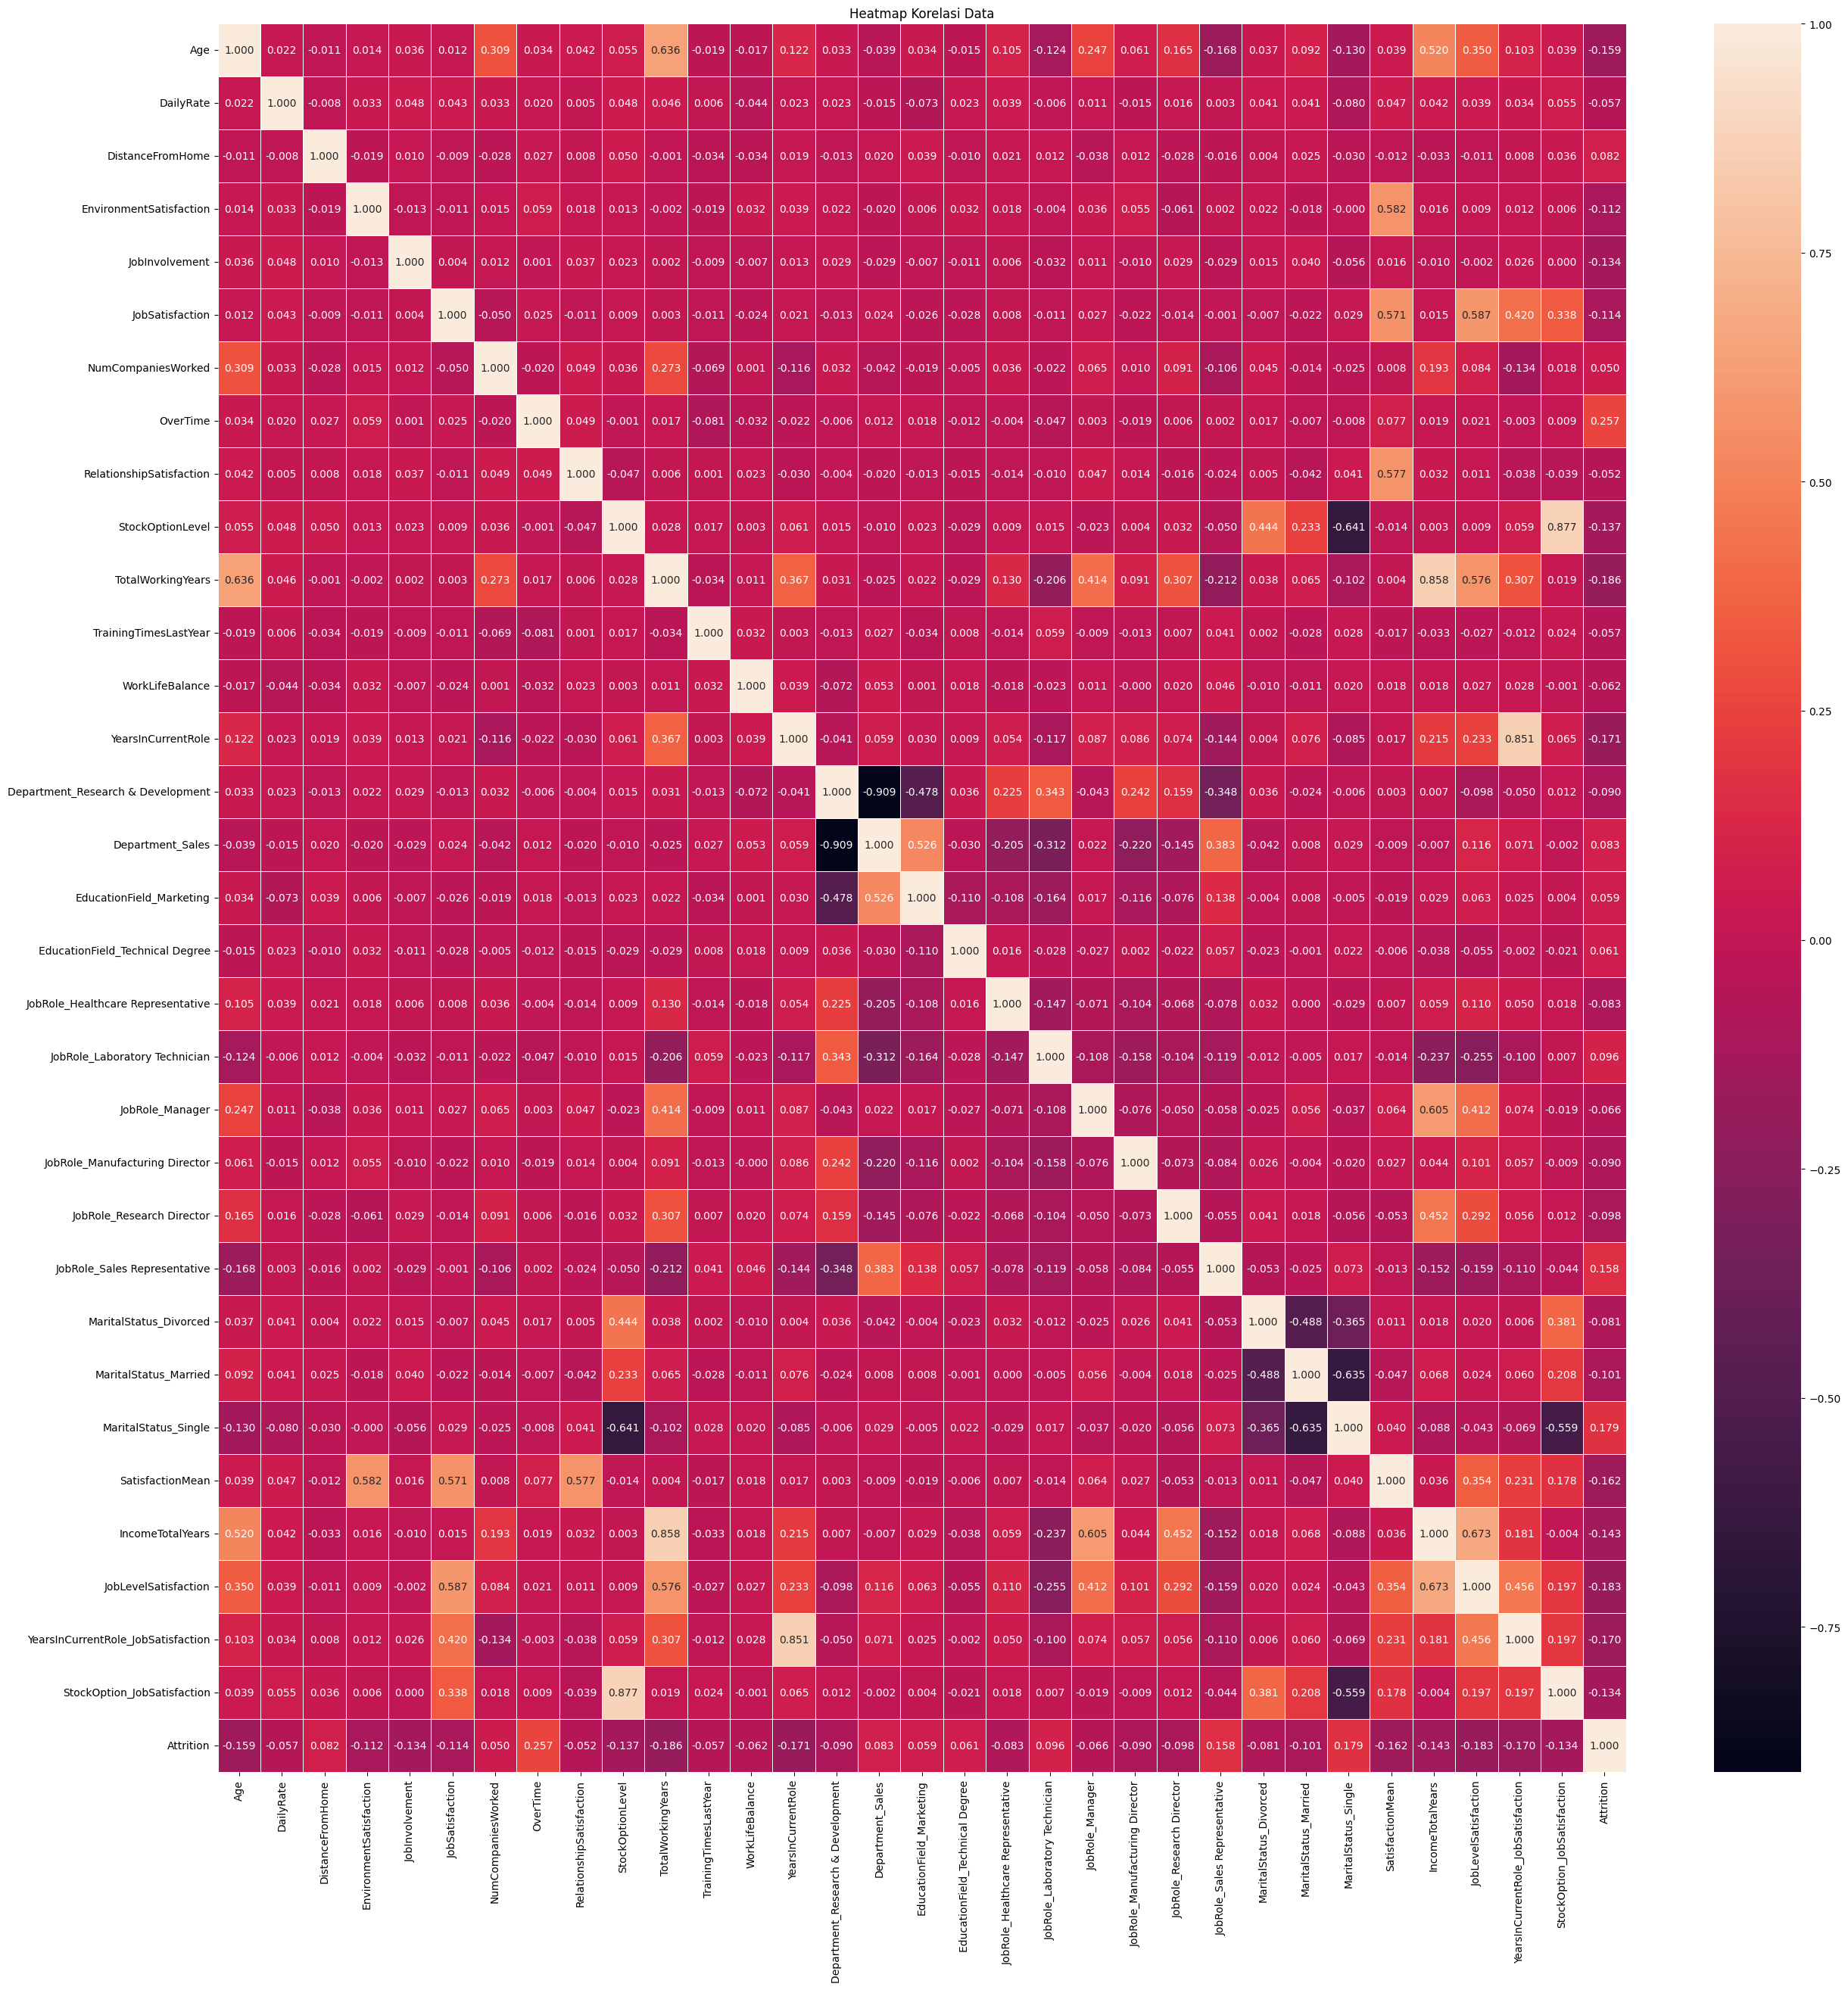

In [ ]:
# Buat dan tampilkan heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(data_filtered.corr(), annot=True, fmt='.3f', linewidths=0.5)
plt.title('Heatmap Korelasi Data')
plt.show()

In [ ]:
# Menghapus kolom yang memiliki korelasi lebih rendah dengan target
data_baru = data_filtered.drop(columns = ['EnvironmentSatisfaction', 'JobSatisfaction',
                                          'RelationshipSatisfaction', 'IncomeTotalYears',
                                          'YearsInCurrentRole_JobSatisfaction', 'StockOption_JobSatisfaction'])

In [ ]:
# Menampilkan data baru
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1387 non-null   int64  
 1   DailyRate                          1387 non-null   int64  
 2   DistanceFromHome                   1387 non-null   int64  
 3   JobInvolvement                     1387 non-null   int64  
 4   NumCompaniesWorked                 1387 non-null   int64  
 5   OverTime                           1387 non-null   int64  
 6   StockOptionLevel                   1387 non-null   int64  
 7   TotalWorkingYears                  1387 non-null   int64  
 8   TrainingTimesLastYear              1387 non-null   int64  
 9   WorkLifeBalance                    1387 non-null   int64  
 10  YearsInCurrentRole                 1387 non-null   int64  
 11  Department_Research & Development  1387 non-null   uint8

## C. Feature Transformation

In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler

# Membuat variabel numerical_new
numerical_new   = ['Age', 'DailyRate', 'DistanceFromHome', 'JobInvolvement', 'NumCompaniesWorked',
                   'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                   'YearsInCurrentRole', 'SatisfactionMean', 'JobLevelSatisfaction']

# Melakukan proses scaling
for num in numerical_new:
  data_baru[num] = StandardScaler().fit_transform(data_baru[num].values.reshape(len(df), 1))

In [ ]:
# Menampilkan data setelah dilakukan proses scaling
data_baru.describe()

,Age,DailyRate,DistanceFromHome,JobInvolvement,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,Department_Research & Development,Department_Sales,EducationField_Marketing,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SatisfactionMean,JobLevelSatisfaction,Attrition
count,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1387.000000,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1.387000e+03,1.387000e+03,1387.000000
mean,-3.201797e-16,-3.073725e-17,-7.684312e-18,-1.511248e-16,1.018171e-16,0.284787,4.098300e-17,-8.452743e-17,1.793006e-17,1.562477e-16,5.122875e-18,0.655371,0.302812,0.107426,0.091565,0.087960,0.183129,0.049748,0.100216,0.046143,0.059841,0.219178,0.458544,0.322278,-8.708887e-17,-9.733462e-17,0.165105
std,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,0.451476,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,0.475418,0.459640,0.309766,0.288514,0.283338,0.386912,0.217502,0.300396,0.209870,0.237278,0.413839,0.498458,0.467517,1.000361e+00,1.000361e+00,0.371409
min,-2.066430e+00,-1.746955e+00,-1.011249e+00,-2.444483e+00,-1.072199e+00,0.000000,-9.294273e-01,-1.538219e+00,-2.171420e+00,-2.501172e+00,-1.192419e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.740140e+00,-1.172920e+00,0.000000
25%,-7.082852e-01,-8.400474e-01,-8.875735e-01,-1.034126e+00,-6.724300e-01,0.000000,-9.294273e-01,-6.423508e-01,-6.225595e-01,-1.082307e+00,-5.757580e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.201712e-01,-6.371585e-01,0.000000
50%,-1.423914e-01,2.347108e-03,-2.691967e-01,3.762308e-01,-2.726613e-01,0.000000,2.382499e-01,-1.944169e-01,1.518710e-01,3.365585e-01,-2.674274e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.017893e-02,-3.692777e-01,0.000000
75%,6.498599e-01,8.782389e-01,5.965307e-01,3.762308e-01,5.268762e-01,1.000000,2.382499e-01,4.028283e-01,1.518710e-01,3.365585e-01,9.658952e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.698056e-01,7.022456e-01,0.000000
max,2.687077e+00,1.716911e+00,2.451661e+00,1.786588e+00,2.525720e+00,1.000000,2.573604e+00,3.538366e+00,2.475162e+00,1.755424e+00,3.432540e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.029790e+00,3.916816e+00,1.000000


Setelah dilakukan transformasi kolom-kolom numerik sekarang memiliki **simpangan baku = 1** dan **rata-rata mendekati 0**.

## D. Handle Class Imbalance

In [ ]:
# Membagi data menjadi target dan fitur
x = data_baru[[col for col in data_baru.columns if col not in ['Attrition']]]
y = data_baru['Attrition'].values

print("Jumlah perbandingan antara kelas attrition dan tidak attrition sebelum class imbalance :")
print(pd.Series(y).value_counts())

Jumlah perbandingan antara kelas attrition dan tidak attrition sebelum class imbalance :
0    1158
1     229
dtype: int64


Berdasarkan informasi di atas, didapatkan bahwa perbandingan antara kelas attrition dan tidak attrition pada kolom `AttritionNum` ada di sekitar **1:5**, sehingga akan dilakukan proses **handle class imbalance**.

In [ ]:
# Melakukan handling class imbalance
from imblearn import over_sampling
x_over, y_over = over_sampling.SMOTE(sampling_strategy = 1).fit_resample(x, y)

print("Jumlah perbandingan antara kelas attrition dan tidak attrition setelah class imbalance :")
print(pd.Series(y_over).value_counts())

Jumlah perbandingan antara kelas attrition dan tidak attrition setelah class imbalance :
1    1158
0    1158
dtype: int64


In [ ]:
# Menggabungkan kembali data setelah dilakukan handling class imbalance
data_final = x_over
data_final['Attrition'] = y_over
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                2316 non-null   float64
 1   DailyRate                          2316 non-null   float64
 2   DistanceFromHome                   2316 non-null   float64
 3   JobInvolvement                     2316 non-null   float64
 4   NumCompaniesWorked                 2316 non-null   float64
 5   OverTime                           2316 non-null   int64  
 6   StockOptionLevel                   2316 non-null   float64
 7   TotalWorkingYears                  2316 non-null   float64
 8   TrainingTimesLastYear              2316 non-null   float64
 9   WorkLifeBalance                    2316 non-null   float64
 10  YearsInCurrentRole                 2316 non-null   float64
 11  Department_Research & Development  2316 non-null   uint8

## E. Feature Tambahan

Beberapa fitur tambahan yang mungkin akan sangat membantu untuk meningkatkan performa model :

- **WorkingHours (Integer)**: Jumlah jam kerja karyawan dalam satu bulan. Berdasarkan UU Ketenagakerjaan jumlah jam kerja karyawan dalam 1 bulan rata-rata adalah 173 jam. Fitur ini bisa digunakan untuk melihat jika seorang karyawan *Over Time*, maka seberapa lamakah jam kerja *Over Time* yang akan membuat karyawan cenderung untuk keluar dari perusahaan.

- **Absence (Integer)**: Jumlah hari karyawan tidak masuk kerja dalam 1 bulan. Karyawan yang ingin keluar dari perusahaan cenderung untuk lebih banyak absen dibandingkan yang tidak.

- **ManagerSatisfaction (Integer)**: Tingkat kepuasan karyawan terhadap manager mereka. Semakin tinggi tingkat kepuasan seorang karyawan terhadap manager mereka, maka semakin rendah juga kemungkinan mereka untuk keluar dari perusahaan.

- **EmployeeEngagement (Integer)**: Tingkat keterlibatan karyawan dengan *event* yang diadakan oleh perusahaan dan hubungan dengan karyawan lainnya. Semakin tinggi tingkat keterlibatan seorang karyawan, maka semakin rendah juga kemungkinan mereka untuk keluar dari perusahaan.